In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size']=15

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.drop_duplicates(inplace=True,keep='first')
df.shape

(9977, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


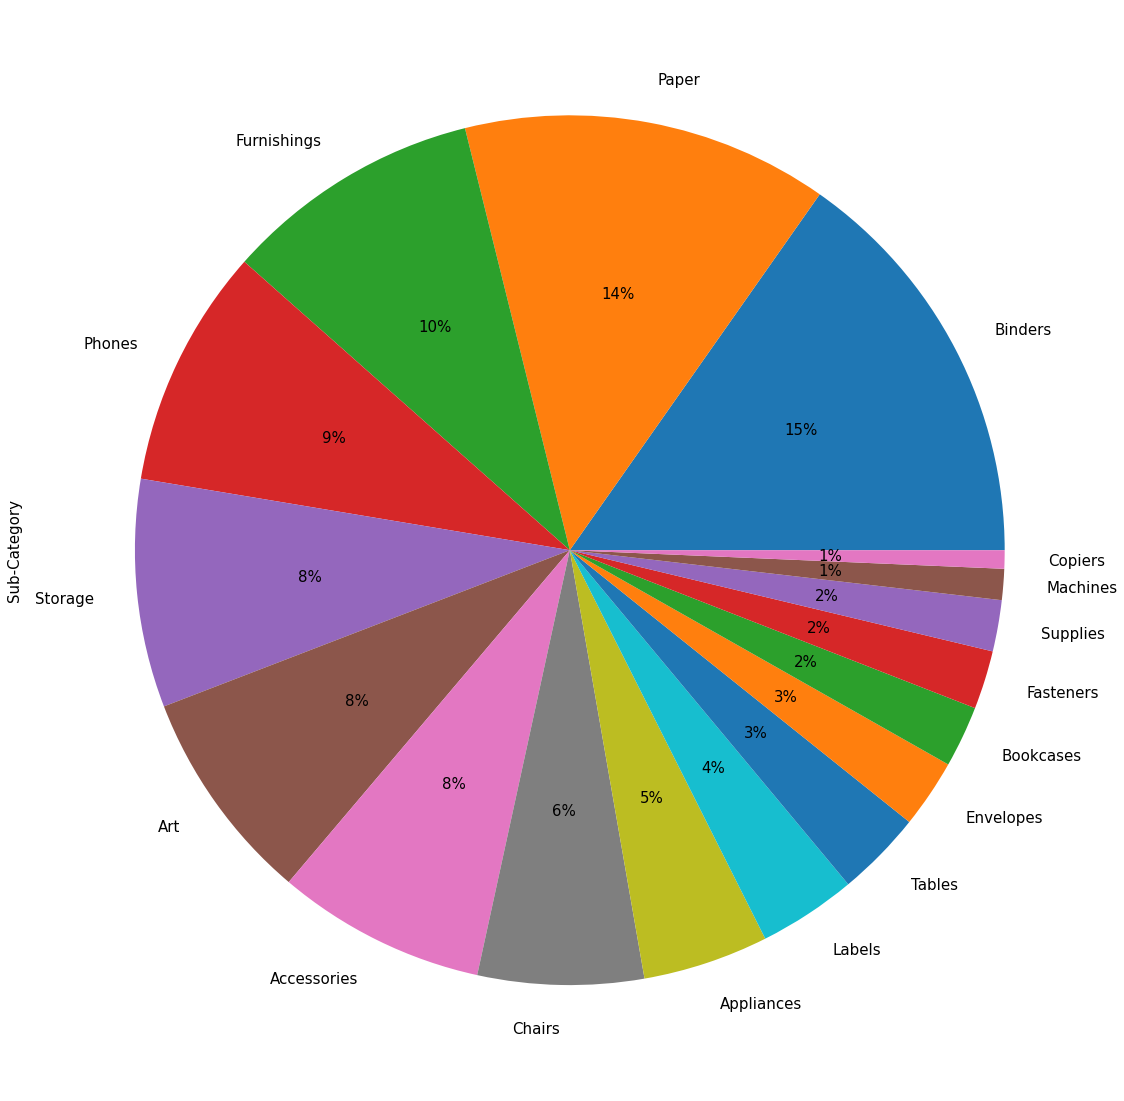

In [34]:
plt.figure(figsize=(20,20))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.0f%%")

# High Profit Sales

In [6]:
df_profit=df[(df['Sales']<=df.Sales.mean()) & (df['Profit']>=df.Profit.mean())].reset_index()

In [7]:
df_profit=df_profit.drop(df_profit.columns[0],1)
df_profit.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
1,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Office Supplies,Envelopes,113.328,9,0.2,35.4150
2,Standard Class,Consumer,United States,New Albany,Indiana,47150,Central,Office Supplies,Labels,75.180,6,0.0,35.3346
3,First Class,Consumer,United States,Troy,New York,12180,East,Office Supplies,Storage,208.560,6,0.0,52.1400
4,Standard Class,Consumer,United States,Los Angeles,California,90004,West,Office Supplies,Paper,146.730,3,0.0,68.9631


Text(0, 0.5, 'Sales')

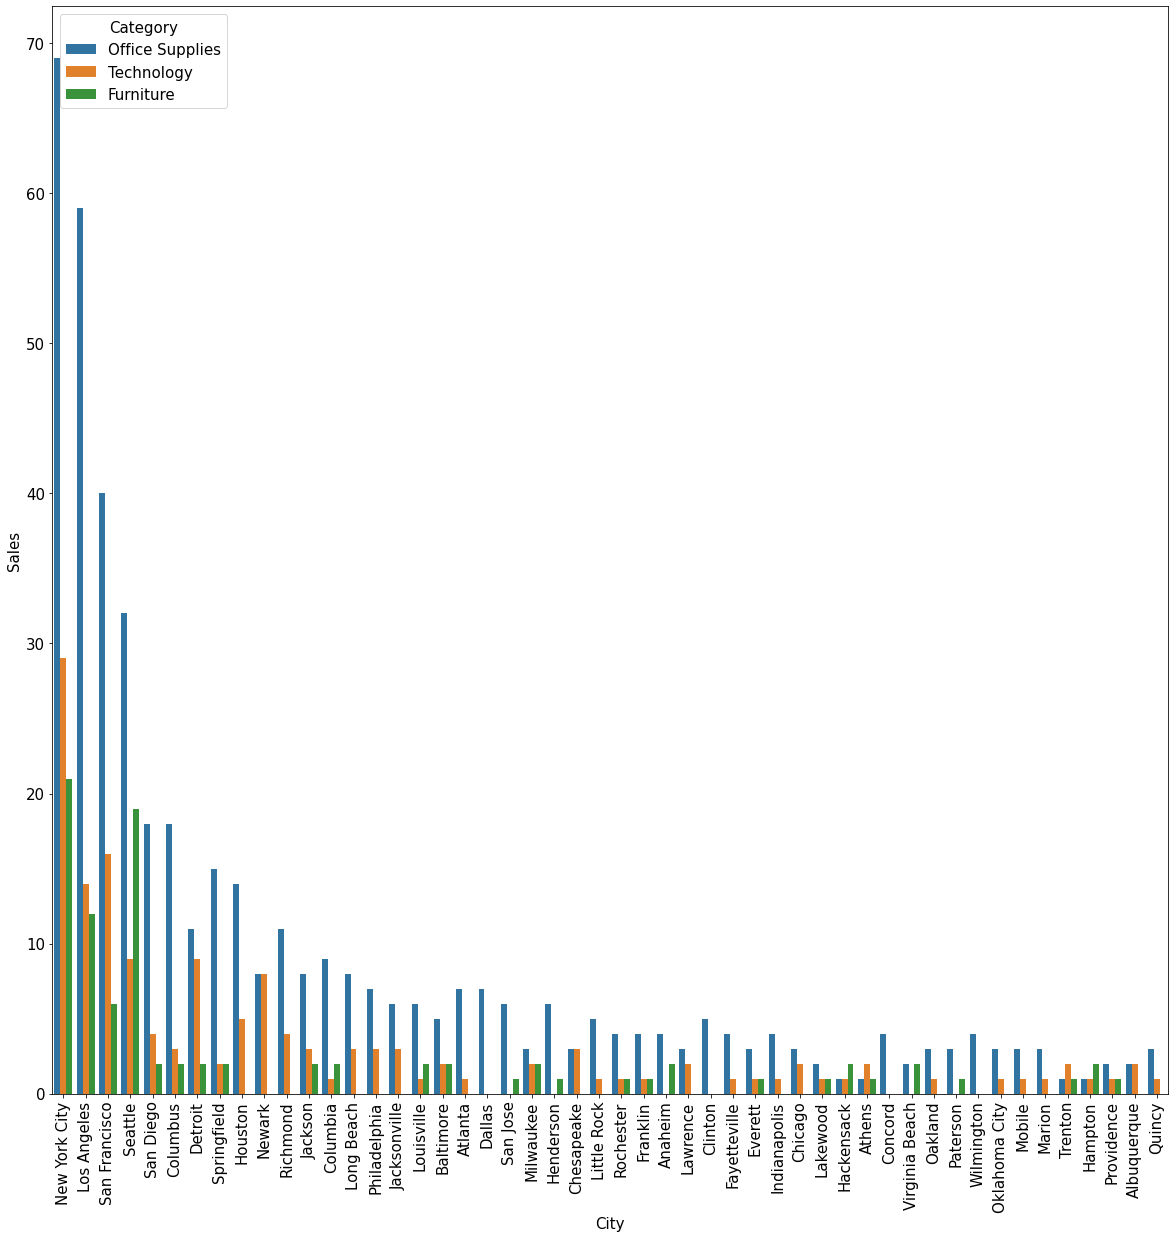

In [18]:
plt.figure(figsize=(20,20))
sns.countplot('City',data=df_profit,order=df_profit.City.value_counts().head(50).index,hue=df_profit.Category)
plt.xticks(rotation=90)
plt.ylabel('Sales')

The maximum high profit sales are seen in cities like New York City, Los Angeles and so on; We see that highest sale is in category of Office Supplies.

# Low Profit Sales

In [19]:
df_target=df[df['Profit']<=df.Profit.mean()].reset_index()

In [20]:
df_target=df_target.drop(df_target.columns[0],1)
df_target.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
1,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


In [21]:
df_target=df_target.drop(['Country','Postal Code','Sub-Category','Quantity'],1)
df_target.head()

,Ship Mode,Segment,City,State,Region,Category,Sales,Discount,Profit
0,Second Class,Corporate,Los Angeles,California,West,Office Supplies,14.6200,0.00,6.8714
1,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,957.5775,0.45,-383.0310
2,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,22.3680,0.20,2.5164
3,Standard Class,Consumer,Los Angeles,California,West,Furniture,48.8600,0.00,14.1694
4,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,7.2800,0.00,1.9656


Text(0, 0.5, 'No. of low  profit Sales')

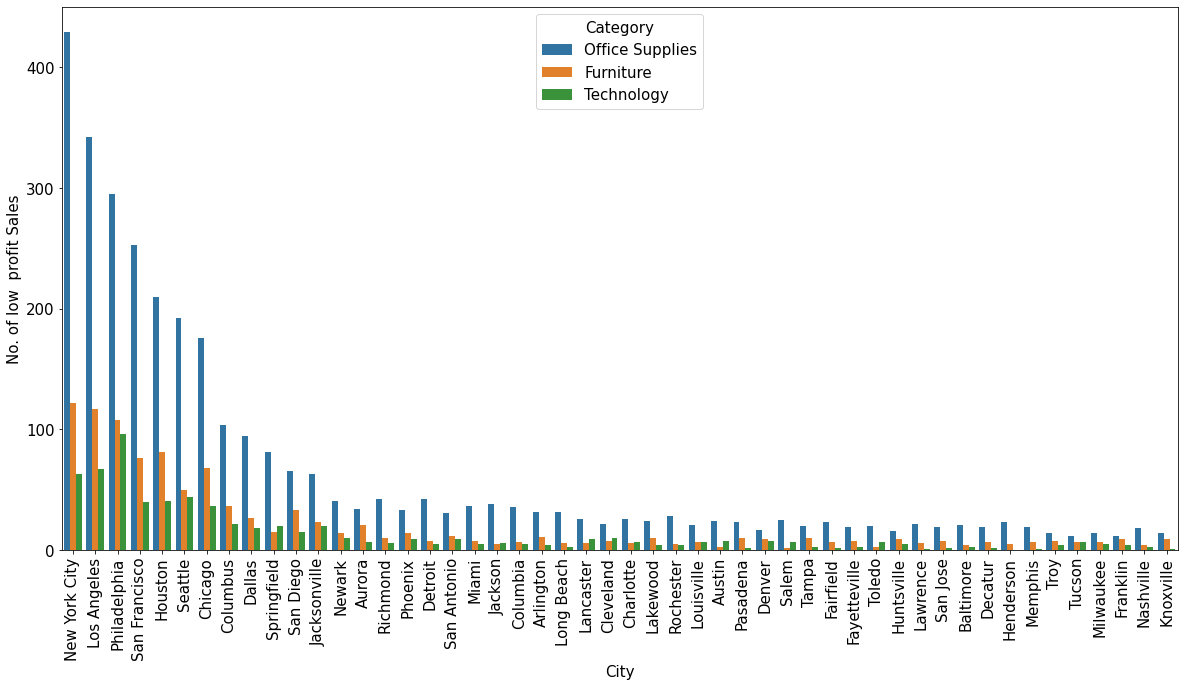

In [35]:
plt.figure(figsize=(20,10))
sns.countplot('City',data=df_target,order=df_target.City.value_counts().head(50).index,hue=df_target.Category)
plt.xticks(rotation=90)
plt.ylabel('No. of low  profit Sales')

We see that the number of low profit sales are maximum in these cities.

In [78]:
print("The number of sales having 30% or more discount are : {}\nThe number of sales generating a loss and having a discount of 30% or more are :{}" .format(df_target[df_target['Discount']>=0.3].shape[0],df_target[(df_target['Profit']<=0) & (df_target['Discount']>=0.3)].shape[0]))

The number of sales having 30% or more discount are : 1369
The number of sales generating a loss and having a discount of 30% or more are :1359


In [77]:
print("The number of sales having 20% or more discount are : {}\nThe number of sales generating a loss and having a discount of 20% or more are :{}" .format(df_target[df_target['Discount']>=0.2].shape[0],df_target[(df_target['Profit']<=0) & (df_target['Discount']>=0.2)].shape[0]))

The number of sales having 20% or more discount are : 4281
The number of sales generating a loss and having a discount of 20% or more are :1883


<h3> So from this we see that stores offering more than 30% discount generally tend to make loss in that sale.

# Total Amount Generated by a City

In [80]:
ex=df[['City','Profit']]
ex

,City,Profit
0,Henderson,41.9136
1,Henderson,219.5820
2,Los Angeles,6.8714
3,Fort Lauderdale,-383.0310
4,Fort Lauderdale,2.5164
...,...,...
9989,Miami,4.1028
9990,Costa Mesa,15.6332
9991,Costa Mesa,19.3932
9992,Costa Mesa,13.3200


In [85]:
ex=ex.groupby('City').sum().sort_values('Profit',ascending=False).reset_index()
ex

,City,Profit
0,New York City,62013.8973
1,Los Angeles,30431.4267
2,Seattle,29121.6825
3,San Francisco,17466.1186
4,Detroit,13146.6935
...,...,...
526,Chicago,-6648.3318
527,Lancaster,-7239.0684
528,San Antonio,-7299.0502
529,Houston,-10175.1755


Text(0.5, 1.0, 'Most Profit Generating Cities')

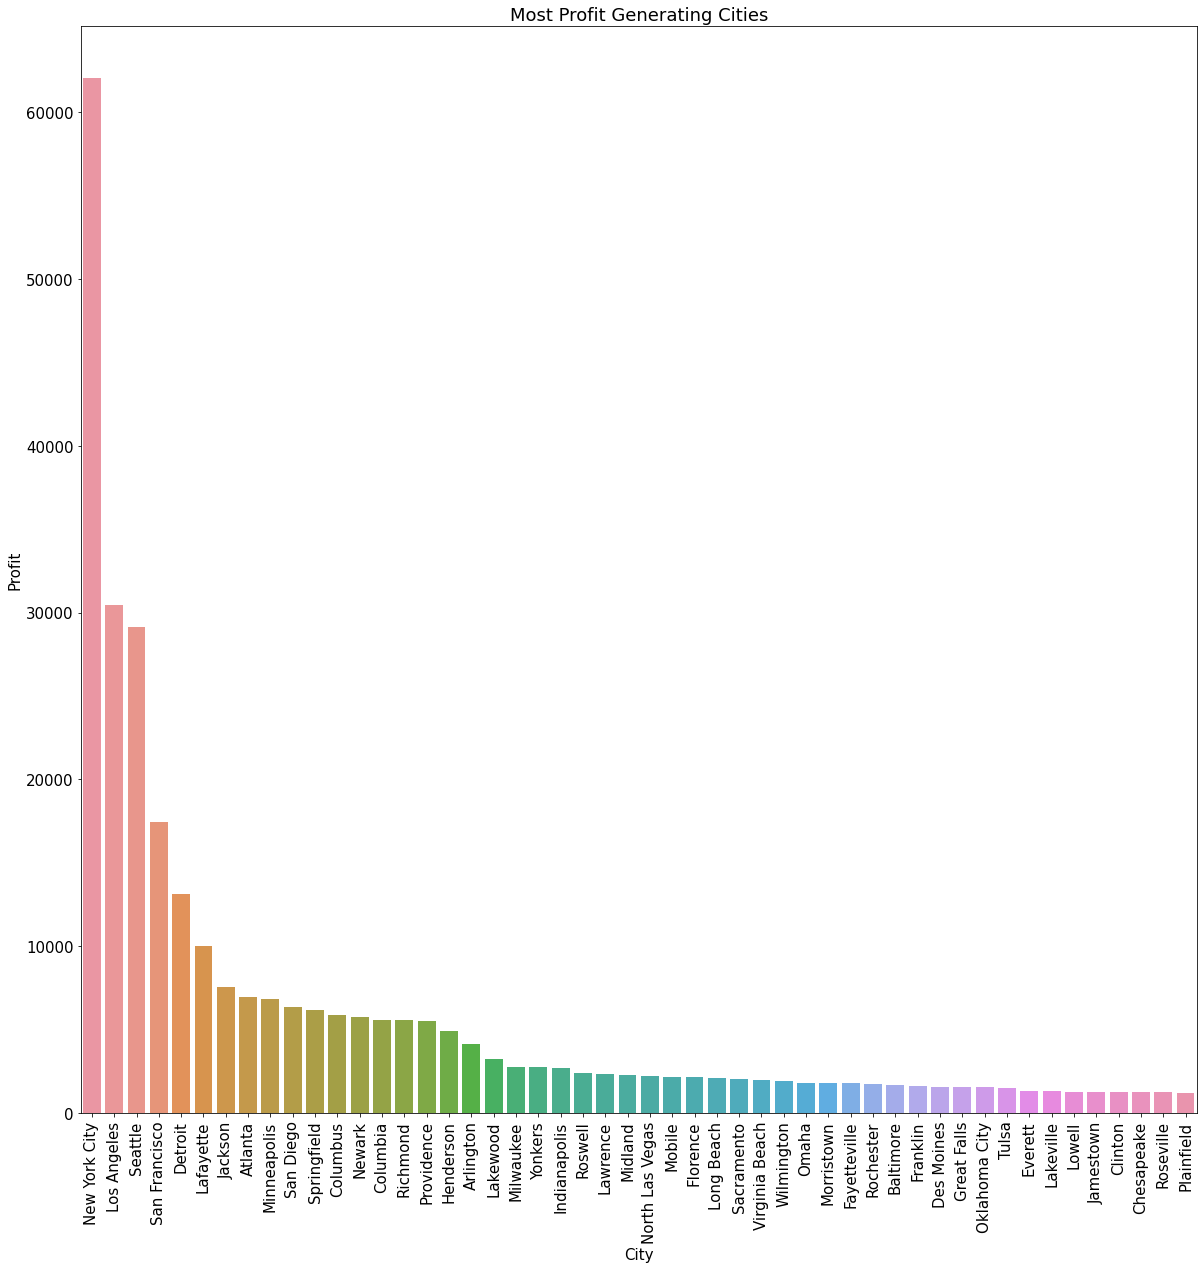

In [88]:
plt.figure(figsize=(20,20))
sns.barplot(x='City',y='Profit',data=ex.head(50))
plt.xticks(rotation=90)
plt.title("Most Profit Generating Cities")

Text(0.5, 1.0, 'Most Loss Generating Cities')

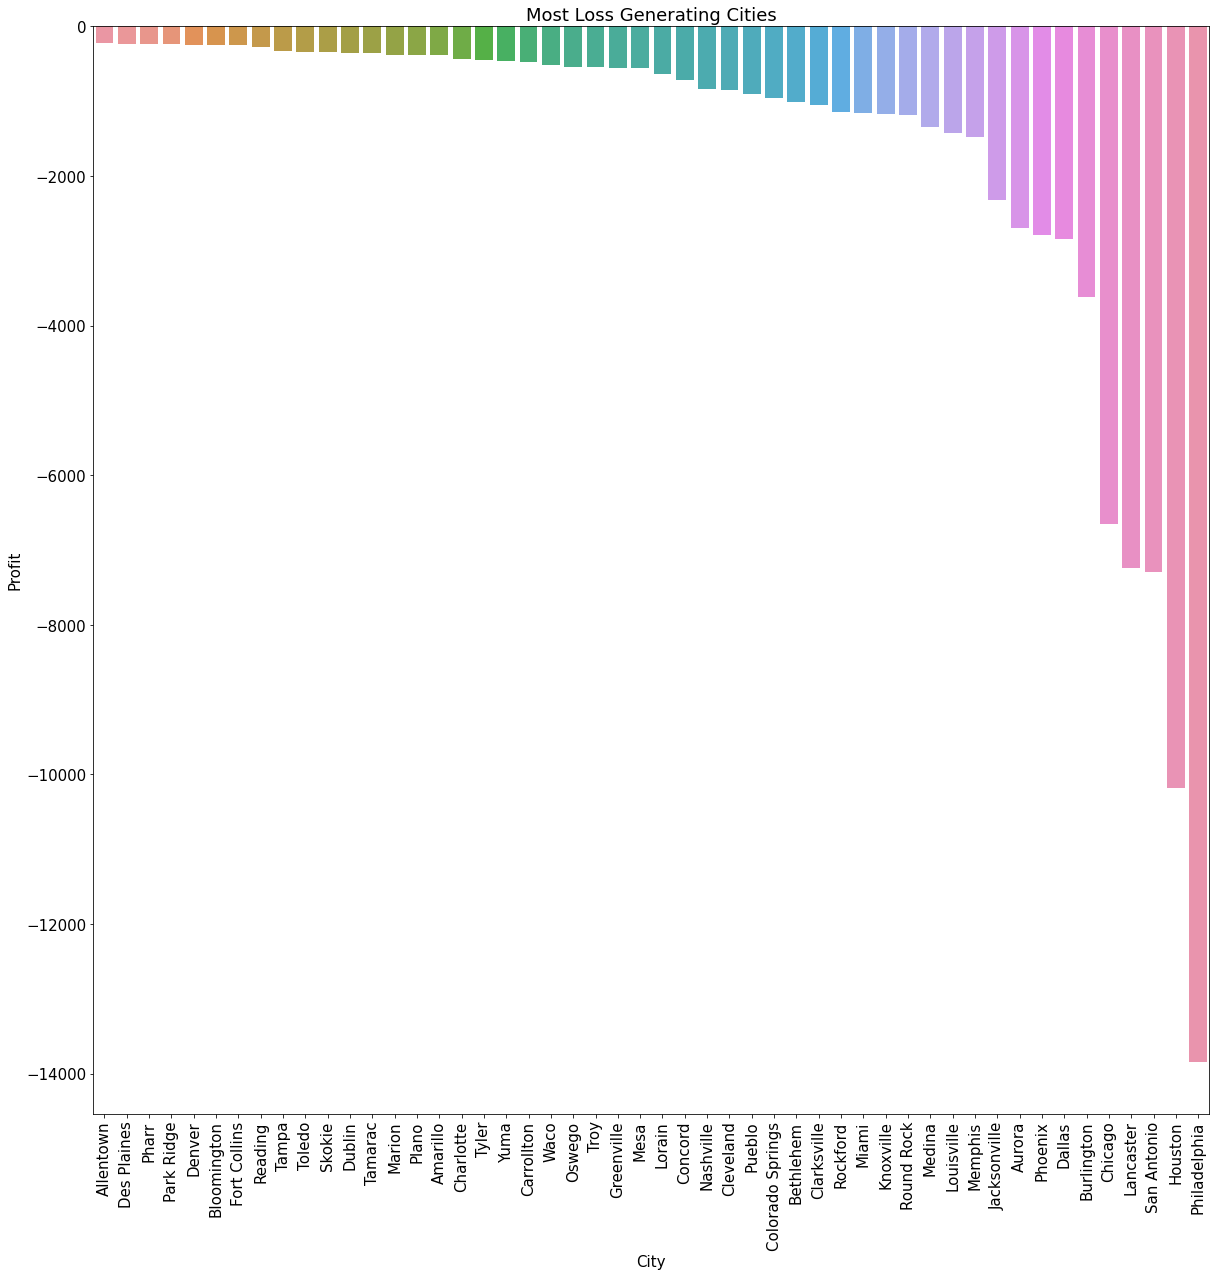

In [89]:
plt.figure(figsize=(20,20))
sns.barplot(x='City',y='Profit',data=ex.tail(50))
plt.xticks(rotation=90)
plt.title("Most Loss Generating Cities")